> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate NoShowAppointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### NO_Show_Appointment .

***This dataset is information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.***

There are 14 columns on this dataset to give more information about the data.


**Patient ID** : The unique Identification number for each person patient. <br>

**Appointment ID**: The unique Identification number for each appointment.<br>

**Gender**: The gender of the patient, either Male or Female.<br>

**Sechedule_day**: The date the appointment was booked.<br>

**Appointment_day**: The actual date of the appointment.<br>

**Age**: Age of the patient. <br>

**Neigborhood**: Location of the hospital.<br>

**Scholarship**: indicates whether or not the patient is enrolled in Brasilian welfare program.<br>

**Hypertension**: If the patient has hypertension, 1 == yes and 0 == no.<br>

**Diabetes**: If the patient has DDiabetes, 1 == yes and 0 == no.<br>

**Alcholism**: If the patient takes alcohol, 1 == yes and 0 == no<br>

**Handcap**: This shows how many handicap defect of each patient<br>

**SMS_recieved**: Shows if a patient recieved SMS or not, 1 == yes and 0 == no<br>

**No_show**: Shows if a patient came for their appointment, "Yes" or "No". ("No" means they showed up on their appointments while "Yes" means they didn't!).</ol>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#read and load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#get number of rows and columns in the dataset
df.shape


(110527, 14)

In [3]:
#see data set
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check each columns datatype in dataset with null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# brief summary of each colums 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df[df.Age<0].value_counts().sum() #check for negative age since the min age is -1

1

In [7]:
df.Age.mean() #check the mean age of all patients

37.08887421173107

## The Age less than 0

In [8]:
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Histogram representation of the Columns in the Dataset.

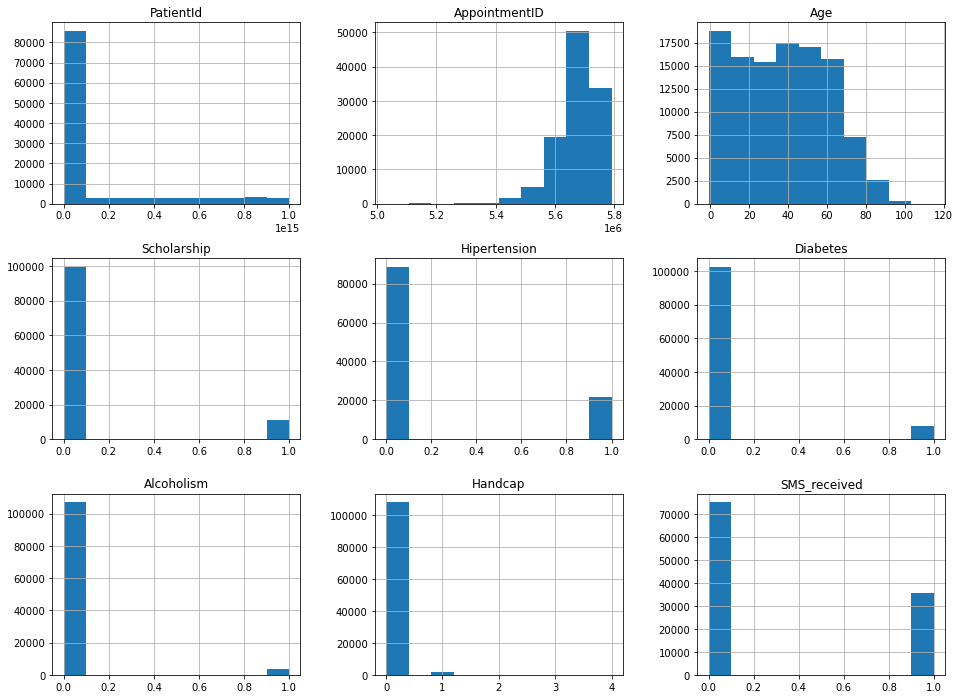

In [9]:
df.hist(figsize=(16,12)); 

### The chart showed that there are more younger patient than older ones with lesser patients with Alcoholism, Hypertension and Handicap.

In [10]:
#check for duplicates
df.duplicated().any()

False

In [11]:
#unique number of patient to get the number of actual patient
df['PatientId'].nunique()

62299

In [12]:
# To get the number of different unique hospital location.
df['Neighbourhood'].nunique()

81

In [13]:
#number of patient in each hospital
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

> **Observation**:
1. We need to change the schedule and apointment day to datetime datatype
2. Rename the Handcap and Hipertension columns properly
3. Drop the age column with negative age because it is not possible to have negative age
4. Drop the AppointmentID because it is not useful for analysis
5. Change No_show column to 1 and 0 to enable better analysis

# Data Cleaning 

### Change the Dates to date time to allow us carry out datetime analysis on them.

In [14]:
# chage schedule day to datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])

In [15]:
df["ScheduledDay"].head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

##### chage appoitmetDay to datetime

In [16]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [17]:
df["AppointmentDay"].head() 

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

## Rename Column and correction spelling mistakes for some Columns

In [18]:
df=df.rename(columns={"Handcap": "Handicap", "Hipertension":"Hypertesion"}) #remane columns name

###### Ensure the correction was made

In [19]:
df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertesion,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###### drop the age row with negative value

In [20]:

df = df.drop([99832])

In [21]:
df[df.Age<0].value_counts().sum() #confirm the drop of the negative age

0

##### dropping AppointmentID column

In [22]:

df.drop(['AppointmentID'], axis=1, inplace=True)

## No_show column, the ‘Yes’ and ‘No’ categorical object data has been replaced with integers (1, 0 ) for use in statistical computations.

In [23]:
# chnging yes and No to 1 and 0,
# 0 == yes, means patient didnt showup
# 1 == No, means patient showed up
df["No-show"].replace({"Yes":0,"No":1},inplace=True)

In [24]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertesion,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [25]:
df.isna().any() #To check for null values

PatientId         False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertesion       False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

In [26]:
df.duplicated().any() #to check for Duplicated rows

True

In [27]:
df[df.duplicated()]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertesion,Diabetes,Alcoholism,Handicap,SMS_received,No-show
154,1.925263e+10,F,2016-04-28 16:38:34+00:00,2016-04-29 00:00:00+00:00,30,ITARARÉ,0,0,0,0,0,0,1
369,4.341600e+14,F,2016-04-29 09:43:15+00:00,2016-04-29 00:00:00+00:00,39,PRAIA DO CANTO,0,0,0,0,0,0,1
371,4.497415e+09,F,2016-04-19 11:16:27+00:00,2016-04-29 00:00:00+00:00,11,BELA VISTA,0,0,0,0,0,0,1
466,5.161239e+12,F,2016-04-27 13:16:02+00:00,2016-04-29 00:00:00+00:00,49,CONSOLAÇÃO,0,0,0,0,0,0,1
554,4.916356e+12,M,2016-03-29 12:40:26+00:00,2016-04-29 00:00:00+00:00,40,CENTRO,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107952,7.424333e+13,M,2016-06-06 12:49:02+00:00,2016-06-08 00:00:00+00:00,26,RESISTÊNCIA,0,0,0,0,0,0,1
108263,9.256500e+11,M,2016-04-26 13:10:03+00:00,2016-06-08 00:00:00+00:00,16,CRUZAMENTO,0,0,0,0,0,0,1
108538,4.951119e+14,F,2016-06-03 08:48:26+00:00,2016-06-03 00:00:00+00:00,28,DO CABRAL,0,0,0,0,0,0,1
109649,5.941811e+13,M,2016-05-04 13:21:32+00:00,2016-06-01 00:00:00+00:00,0,FORTE SÃO JOÃO,0,0,0,0,0,0,1


We have 618 duplicated rows, There is high possibility that one patient visited the hosipital more than once, so I won't drop duplicate rows

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   Gender          110526 non-null  object             
 2   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 4   Age             110526 non-null  int64              
 5   Neighbourhood   110526 non-null  object             
 6   Scholarship     110526 non-null  int64              
 7   Hypertesion     110526 non-null  int64              
 8   Diabetes        110526 non-null  int64              
 9   Alcoholism      110526 non-null  int64              
 10  Handicap        110526 non-null  int64              
 11  SMS_received    110526 non-null  int64              
 12  No-show         110526 non-null  int64              
dtypes: datetime64[

## After discussing the structure of the data and any problems that need to be
## cleaned, perform those cleaning steps in the second part of this section.b


# Questions to be answered

### 1. What is the relationship between patient that show up and recieving SMS?
### 2. The relationship betwwen show up and Gender?
### 3. If wait time( Diffrences between schedule day and appointment Day) affect show up?


## EDA

## Question 1: Relationship between patient that show up and recieving SMS.

This is check if patients that recieved SMS are likely to come for their scheduled appointment and know if sending  more sms will increase Show time.

##### Number of patient that showed vs Number that didn't show up

In [29]:

showed_up = df['No-show'] == 1
not_showed_up = df['No-show'] == 0

In [30]:
df.SMS_received[showed_up].count(),df.SMS_received[not_showed_up].count()

(88207, 22319)

More patient showed up, about 88207 patient showed up for their appointment

### This is to know how many patients recieved SMS

In [31]:
df_SMS = df[df["SMS_received"]==1].value_counts()
df_No_SMS  = df[df["SMS_received"]==0].value_counts()

In [32]:
df_SMS.count(),df_No_SMS.count() #Number people that recievd the sms vs number that didn't

(35482, 74426)

This showed that lesser patient got this SMS, about just 35482 patients received this SMS

In [33]:
df[df["SMS_received"]==1][showed_up].value_counts().sum() #number of people that recieved and showed.

C:\Users\USER\AppData\Local\Temp/ipykernel_16372/952992934.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["SMS_received"]==1][showed_up].value_counts().sum() #number of people that recieved and showed.


25698

Out of the 35,482 patients only 25698 showed up.

##### calculate total counts of no shows in data

In [34]:

noshow_totals = df.groupby(['SMS_received','No-show']).count()
noshow_totals.head()

PatientId  Gender  ScheduledDay  AppointmentDay    Age  \
SMS_received No-show                                                           
0            0            12535   12535         12535           12535  12535   
             1            62509   62509         62509           62509  62509   
1            0             9784    9784          9784            9784   9784   
             1            25698   25698         25698           25698  25698   

                      Neighbourhood  Scholarship  Hypertesion  Diabetes  \
SMS_received No-show                                                      
0            0                12535        12535        12535     12535   
             1                62509        62509        62509     62509   
1            0                 9784         9784         9784      9784   
             1                25698        25698        25698     25698   

                      Alcoholism  Handicap  
SMS_received No-show                        
0            0             12535     12535  
             1             62509     62509  
1            0              9784      9784  
             1             25698     25698

This table says that out of the patients that didn't recieved sms, 62509 showed up and 12535 didn't show up while for those that recieved 9784 didn't show and 25698 showed.

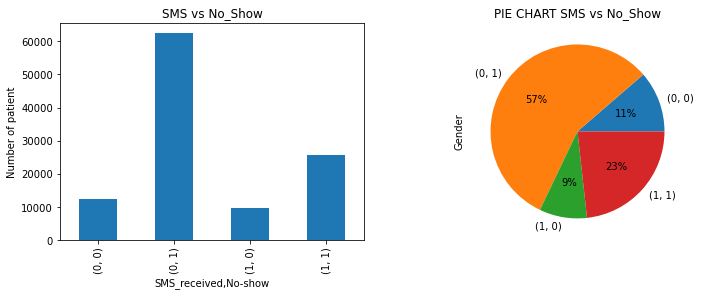

In [35]:
plt.subplot(1, 2, 1)
noshow_totals.Gender.plot(kind='bar', figsize=(12,4), title='SMS vs No_Show',ylabel='Number of patient')


plt.subplot(1, 2, 2)
noshow_totals.Gender.plot(kind='pie', figsize=(12,4),title='PIE CHART SMS vs No_Show', autopct='%1.0f%%');

The chart aboved showed that 57% were the people that showed even without recieving the SMS represented by [0,1]. It also showed that about 11% didn't show up nor recieved SMS.


This shows that majority of the patient didn't get the SMS and majority of the patient did show up so there isn't any concrete relationship between them but we will explore futher with Gender.

##### Show the relation of No show by gender of patient that recieved the sms

In [36]:

noshow_RecievedSMS_by_gender = df[df['SMS_received']==1].groupby(['Gender', 'No-show']).count()['PatientId']
noshow_RecievedSMS_by_gender

Gender  No-show
F       0           6720
        1          17482
M       0           3064
        1           8216
Name: PatientId, dtype: int64

This shows that out of the 0ver 25000 patient that got the SMS, more female showed up(17482) which is the majority of the patient that recieved the SMS


##### Show the relation of No show by gender of patient that didn't recieved the sms

In [37]:

noshow_NoSMS_by_gender = df[df['SMS_received']==0].groupby(['Gender', 'No-show']).count()['PatientId']
noshow_NoSMS_by_gender

Gender  No-show
F       0           7874
        1          39763
M       0           4661
        1          22746
Name: PatientId, dtype: int64

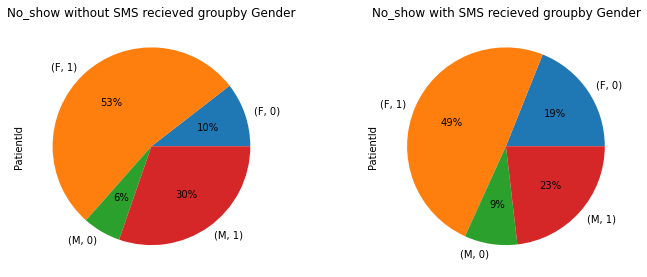

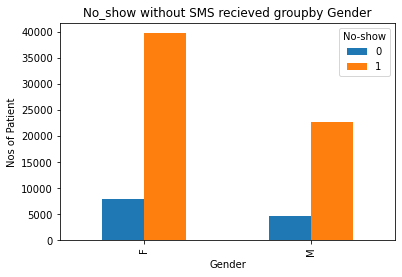

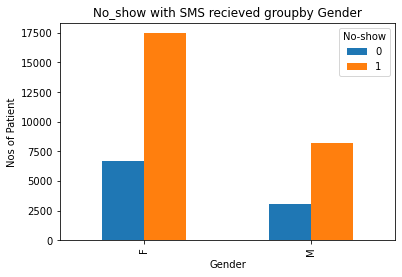

In [38]:
plt.figure(figsize = [18, 10])

plt.subplot(2, 3, 1)
noshow_NoSMS_by_gender.plot(kind='pie', autopct='%1.0f%%', title='No_show without SMS recieved groupby Gender')

plt.subplot(2, 3, 2)
noshow_RecievedSMS_by_gender.plot(kind='pie', autopct='%1.0f%%',title='No_show with SMS recieved groupby Gender');

#plt.subplot(2, 3, 4)
noshow_NoSMS_by_gender.unstack().plot(kind='bar',stacked=False,ylabel='Nos of Patient', title='No_show without SMS recieved groupby Gender')

#plt.subplot(2, 3, 5)
noshow_RecievedSMS_by_gender.unstack().plot(kind='bar',stacked=False,ylabel='Nos of Patient', title='No_show with SMS recieved groupby Gender');

More percentage of Female (49%) showed with SMS recieved while lesser  percentage Male(23%) showed up after recieving SMS. This is to check what sector are more likely to respond or check the SMS.

## Question 2: Relationship betwwen show up and Gender

### Research Question 2 

## How many patients for female and male ?

In [39]:
df_Female = df[df.Gender == 'F']
df_Male= df[df.Gender == 'M']

In [40]:
Female_Num = df_Female.PatientId.count()
Male_Num = df_Male.PatientId.count()

In [41]:
(Female_Num,Male_Num) #number of both male and Female in the dataset

(71839, 38687)

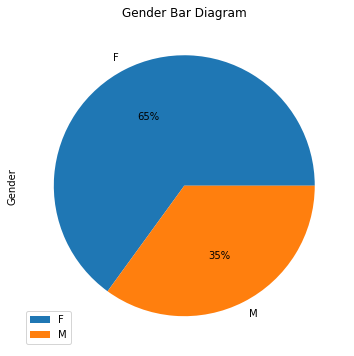

In [42]:
plt.figure(figsize = [14, 6])

df['Gender'].value_counts().plot(kind='pie',autopct='%1.0f%%');
plt.title('Gender Bar Diagram');
plt.legend();


### From the gender graph, it can be seen that number of female patients 65% (71839) and number of male patients 35% (38687).

### I can said the number of females are greater than of males patients.

In [43]:
NoShow_By_Gender=df.groupby(["Gender","No-show"]).count() #count each gender patients who showed up and who didn't
NoShow_By_Gender.head()

PatientId  ScheduledDay  AppointmentDay    Age  Neighbourhood  \
Gender No-show                                                                  
F      0            14594         14594           14594  14594          14594   
       1            57245         57245           57245  57245          57245   
M      0             7725          7725            7725   7725           7725   
       1            30962         30962           30962  30962          30962   

                Scholarship  Hypertesion  Diabetes  Alcoholism  Handicap  \
Gender No-show                                                             
F      0              14594        14594     14594       14594     14594   
       1              57245        57245     57245       57245     57245   
M      0               7725         7725      7725        7725      7725   
       1              30962        30962     30962       30962     30962   

                SMS_received  
Gender No-show                
F      0               14594  
       1               57245  
M      0                7725  
       1               30962

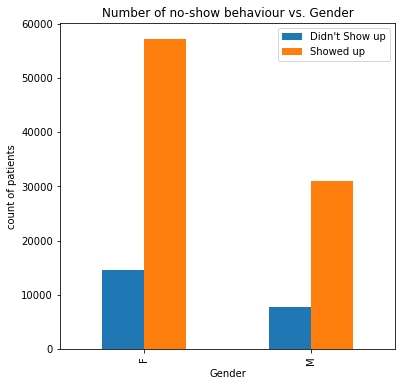

In [44]:
NoShow_By_Gender.unstack()["Age"].plot(kind="bar",figsize=(6,6))
plt.title("Number of no-show behaviour vs. Gender") 
plt.legend(["Didn't Show up", "Showed up"]);
plt.ylabel("count of patients");

Based on the chart, we can see there is a similar graphical representation for both gender, and due to higher female patients they have a higher number of show up.

In [45]:
#new dataframe holds female who showed up only.
df_Female_show = df_Female[df_Female["No-show"] == 1] 
#count of females who showed up on their appointments
Num_F_show = df_Female_show["No-show"].count()
Num_F_show

57245

In [46]:
#new dataframe holds male who showed up only.
df_Male_show = df_Male[df_Male["No-show"] == 1] 
#count of males who showed up on their appointments
Num_M_show = df_Male_show["No-show"].count()
Num_M_show

30962

In [47]:
#Female percentage 
Femal_percentage_noshow = Num_F_show/Female_Num *100
Femal_percentage_noshow

79.68512924734476

In [48]:
#male percentage
Male_percentage_noshow = Num_M_show/Male_Num *100
Male_percentage_noshow

80.03205211052808

### There is same over percentage of 80% of both  gender showing up, we have about 57,245 female that showed up while 30962 male, but similar ratio to the overall specific gender that book an appointment. this shows that female are generally take health as piority or are prone to more health problem.

## Question3: Relationship between Duration and Showing up.

## This is to check if patient that wait longer to see the doctors show up or if there is no relationship between wait duration and showing up

To calculate the duration, check the differences between appointment day and scheduleday.

In [49]:
df["Duration"] = (df["AppointmentDay"].dt.date) - (df["ScheduledDay"].dt.date) #.dt.date to differ only date part

In [50]:
df["Duration"] = df["Duration"].dt.days #to convert column to numerical column contain number of days

In [51]:
df["Duration"].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Duration, dtype: float64

In [52]:
#check durations with negative days
df[df["Duration"]<0].value_counts().sum()

5

In [53]:
#find the mean duration
df["Duration"].mean()

10.183793858458642

In [54]:
df[df["Duration"]<0].head()  #confirm dataset for negative days

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertesion,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration
27033,7.839273e+12,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,0,-1
55226,7.896294e+12,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,-1
64175,2.425226e+13,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,0,-1
71533,9.982316e+14,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,-6
72362,3.787482e+12,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,0,-1


### Remove negative days because it not possible to schedule an appointment date that has passed, this could be an entry error.

In [55]:
df = df.drop([27033,55226,64175,71533,72362])  #drop days with negative duration

In [56]:
df[df["Duration"]<0].head() #confirm droping dataset with negative days

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertesion,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration


In [57]:
df['Duration'].corr(df['No-show']) #negative corr, higher less likely to show....

-0.18631962066751923

In [58]:
Duration=df.Duration.value_counts()
Duration

0      38562
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: Duration, Length: 129, dtype: int64

In [59]:
df.groupby("No-show").mean()["Duration"] #check for mean duration of showing or not showing up 

No-show
0    15.835484
1     8.754759
Name: Duration, dtype: float64

The mean duration of people that didn't show is 16days while 9days for people that showed, so if the patient wait so long they don't show up or visit a different hosiptal not recorded in the dataset

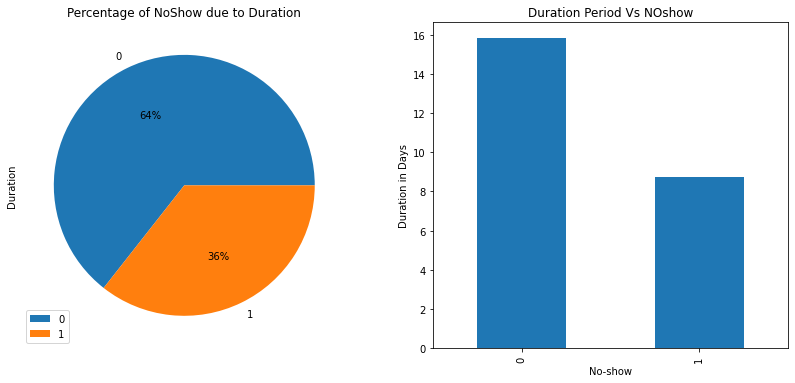

In [60]:
plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)
df.groupby("No-show").mean()["Duration"].plot(kind='pie',title='Percentage of NoShow due to Duration',autopct='%1.0f%%')
plt.legend(); #longer duration 
plt.subplot(1, 2, 2)
shown=['Noshow', 'Show']
df.groupby("No-show").mean()["Duration"].plot(kind='bar', title='Duration Period Vs NOshow', ylabel='Duration in Days');


### Based on these charts the mean days for no show is hiher that the mean days of patients that eventually showed up.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Analysis Shortcoming & Data Limitations

## Limitations 

##### 1 Missing details that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient the patient have a series medical issue or not, How the patient book the appointment, where does the patient leave and if it affect them coming back.

##### 2 The dataset didn't explain why the patient comes to the doctor, which may give an additional explanation about why they miss their appointments.

##### 3 There were some illogical data, like having a nagative age and negative duration which could be as a result of poor data collection, these rows were dropped and might have affected the data analysis

## Analysis Description

1. Age is skewed to the right which shows there are more younger patients, 
2. 81 different hospital with Jardim has the most visited.
3. Very few people received the scholarship, have diabetes, hypertension and are handicap.

### Question1: Relationship between patient that show up and recieving SMS.

#### This is to check if get this SMS will make more patients show up for their appointment.

#### II first analysed the number of patientsthat showed up, number that got the sms and out of the  number that got the sms how many actually showed up. then I plotted chart to know the percentage of each fration grouping them by showup and recieved SMS,

#### I also anlysed by getting the number of both gender of patient that showed up after getting the SMS and patient that showed up without getting the SMS

#### Conclusion: There is no real relationship between showing up and receiving SMS as higher people showed without receiving SMS but Female patients react more positively to SMS than male

### Question2: The relationship betwwen show up and Gender?
##### This is to check what gender is likely to show up for an appointment.

#### I analyzed this by getting the number of both female and male patients and I also checked for number of both gender that showed up and didn't. Then I found the percentage rate of showing up for each gender by calcultion the show up of male by total number of male only and getting the percentage and same for femle gender.

#### conclusion: There are more female patients than male patients which explains why more female  didnot show up but apparently they have a close percentage for showing up in both gender.As 79.68 % showed up for female while 80% showed up for male respectively.

### Question3: What   is the relationship between Duration and Showing up.

##### This is to check if patient that wait longer to see the doctors show up or if there is no relationship between wait duration and showing up.

#### To Analyze this I calculated the duration by finding the differences betweeen scheduled day and Appointment day, then I noticed that I had negative duration which isn't possible, so I dropped the rows affected. Then I got the mean duration for both show up and patient that didn't show up and also checked for the correlation between duration and showup.

#### Conclsion: There is a negative correlation between duration  and Showing up, the more duration before appointment from schedule day the less likely for patients to show up.

Refrences : https://www.codegrepper.com, https://stackoverflow.com/, https://datatofish.com/, and https://www.geeksforgeeks.org/